# 2章 エンドツーエンドの機械学習プロジェクト

この章では、最近、不動産会社に採用されたデータサイエンティストになったつもりで、プロジェクトを最初から最後まで体験していただこう。主要なステップは次に示す通りだ。
1. 全体の構図をつかむ。
2. データを手に入れる。
3. 洞察を得るためにデータを見つけ出し、可視化する。
4. 機械学習アルゴリズムが処理しやすいようにデータを準備する。
5. モデルを選択して訓練する。
6. モデルを微調整する。
7. ソリューションをプレゼンテーションする。
8. システムを本番稼働、モニタリング、メンテナンスする。

## 2.1 実際のデータの操作

機械学習を学ぶときには、人工的なデータセットでなく、実世界のデータで実際に体験してみるとよい。幸い、素材としては、あらゆる分野の無数のオープンデータセットがある。データが得られる場所としては、次のようなものがある。
- 人気のあるオープンデータリポジトリ
    - カリフォルニア大学アーバイン校MLリポジトリ (http://archive.ics.uci.edu/ml/)
    - Kaggleデータセット (https://www.kaggle.com/datasets/)
    - AmazonのAWSデータセット (http://aws.amazon.com/fr/datasets/)
- メタポータル (オープンデータリポジトリのリスト)
    - http://dataportals.org/
    - http://opendatamonitor.eu/
    - http://quandl.com/
- 人気のあるオープンデータリポジトリのリストが含まれているその他のページ
    - WikipediaのMLデータセットリスト (https://goo.gl/SJHN2k/)
    - Quora.comの質問に対する回答 (http://goo.gl/xDR78y/)
    - redditのDatasets subreddit (https://www.reddit.com/r/datasets)
    
この章では、StatLibリポジトリのカリフォルニアの住宅価格のデータセットを使うことにした。このデータセットは、1990年のカリフォルニア州の調査から得られたデータであり、新しくないが（当時は、ベイエリアでもいい家を買えた）、学習用に優れている点がいくつもあるので、最新データのようなつもりで使っていくことにしよう。また、学習の目的のために、分類用の属性をひとつ追加し、いくつかの特徴量を取り除いている。

## 2.2 全体像をつかむ

機械学習ハウジング株式会社へようこそ。あなたが最初に与えられた仕事は、カリフォルニア州の国勢調査データを使ってカリフォルニアの住宅価格のモデルを作ることができる。このデータには
カリフォルニア州の各国勢調査細分区グループの人口、収入の中央値、住宅価格の中央値といった指標が含まれている。細分区グループは、合衆国国勢調査国がサンプルデータを公開している最小の地理的単位である（一般に、細分区グループには、600人から3,000人の人口がある）。細分区グループでは長いので、「区域」と呼ぶことにしよう。

あなたのモデルは、このデータを使って学習し、ほかのすべての指標から任意の区域の住宅価格のちゅおうちを予測できなければならない。

## 2.2.1 問題の枠組みを明らかにする

上司には、まずビジネスサイドの目的が何なのかを尋ねよう。モデルを構築することは、たぶん最終的な目的ではない。会社はこのモデルをどのように使うつもりで、何を得たいのだろうか。これが重要なのは、問題をどのように組み立てていくか、どのアルゴリズムを選択するか、モデルの評価のためにどのような評価指標を使うか、どれくらいの労力をかけるべきかといったことがこれによって左右されるからだ。

上司は、ほかの多くの信号(Signal)とともに、モデルの出力（区域の住宅価格の中央値の予測値）をほかの機械学習システムに与えるのだと答える。この下流システムは、その地域に投資する価値があるかどうかを判断する。収益に直接影響を与えるので、これを正しく判断することはきわめて重要である。

次に尋ねるべきことは、現在のソリューション（あれば）がどのようなものかだ。既存ソリューションは、性能の比較対象になることが多く、問題解決のヒントが得られることも多い。上司によれば、区域の住宅価格は専門家がマニュアルで推計しているということだ。あるチームは、住宅価格の中央値を集められない時、区域の最新情報を集め、複雑な規則を使って推計値を導き出している。これは時間とコストがかかり、推計結果はそれほどよくない。

チームが実際の住宅価格の中央値を得られる場合、しばしば推定値が10%以上もはずれていることに気づく。これは、その区域に関する他のデータを考慮して、区域の住宅価格の中央値を予測するモデルを訓練することが有用だと会社が考えているからである。国勢調査データは、他のデータと同じく数千もの区域の住宅価格の中央値を含むため、このような目的に利用する巨大なデータセットに見える。

これらの情報が揃えば、システム設計に取り掛かれる。まず、問題を構成していかなければならない。教師あり学習、教師なし学習、強化学習のどれか。分類、回帰、その他のタスクか。バッチ学習とオンライン学習のどちらを使うべきか。先に進む前に、少し時間を割いてこれらの問いに自分で答えてみていただきたい。

答えは見つかっただろうか。まず、ラベル付きの訓練データが与えられる（個々のインスタンスには、期待される出力、すなわち住宅価格の中央値が含まれている）ので、これは典型的な教師あり学習のタスクである。また、値の予測を求められているので、典型的な回帰のタスクである。より専門的に言えば、複数の特徴量（区域の人口、収入の中央値など）を使って予測するので、**多変量回帰**(multivariate regression)問題である。1章の問題は、1人あたりのGDPというひとつの特徴量だけから暮らしへの満足度を予測したので、**単変量回帰**(univariate regression)問題である。そして、システムに継続的にデータフローが届くわけではないので、変化するデータにすばやく対応する必要は特にない。そして、データはメモリに十分収まる程度の量なので、プレーンなバッチ学習で問題はないだろう。

## 2.2.2 性能指標を選択する

次のステップは性能指標の選択である。回帰問題の典型的な性能指標は、**平均二乗誤差**(Root Mean Square Error: RMSE)である。これは、どの程度の誤差がシステムの予測に含まれるのかについて、大きな誤差に重みを付けた上で示す。式2-1はRMSEを計算する式である。
$$
    {\rm RMSE}(\pmb{X}, h)
        = \sqrt{\frac{1}{m} \left( h \,\left(\pmb{x}^{(i)} \right) - y^{(i)} \right)^2} \tag{2-1}
$$
回帰の性能指標としては一般にRMSEが望ましいものとされているが、ほかの関数を使った方がよい場合もある。たとえば、外れ値となる区域が多数ある場合について考えてみよう。そのような場合は**平均絶対誤差**(Mean Absolute Error: MAE)を使うことを考えるとよい。**平均絶対偏差**(Mean Absolute Deviation)と呼ばれることもある。
$$
    {\rm MAE}(\pmb{X}, h)
        = \frac{1}{m} \sum^m_{i=1} \left| h \left(\pmb{x}^{(i)} \right) - y^{(i)} \right| \tag{2-2}
$$
RMSEとMAEは、どちらもふたつのベクトルの距離を測定する方法である。さまざまな距離の指標、**ノルム**(norm)があり得る。
- 誤差の二乗の総和の平均(RMSE)は、**ユークリッドノルム**(Euclidian norm)に対応する。これは、人々が普通に考える距離の概念である。これは$l_2$**ノルム**とも呼ばれ、$\|\cdot\|_2$または単に$\|\cdot\|$と表記される。
- 誤差の絶対値の総和(MAE)は$l_1$モデルで、$\|\cdot\|_1$と表記される。これは、直交する道に沿った形でしか移動できない都市でふたつの位置の間を移動するときの距離を計算するのと同じで、**マンハッタンノルム**(Manhattan norm)とも呼ばれる。
- より一般的に、$n$個の要素を含むベクトル$\pmb{v}$の$l_k$**ノルム**は、$\|\pmb{v}\|_k = (|v_0|^k + |v_1|^k + \cdots + |v_n|^k)^{\frac{1}{k}}\cdot l_0$と定義される。ここで、$l_0$はベクトルの非ゼロ要素の数を、$l_{\infty}$はベクトルの絶対値の最大を示す。
- ノルムの添字が大きくなればなるほど、大きな値を重視し、小さな値を無視する方向に傾く。RMSEがMAEよりも外れ値の影響を受けやすいのはそのためである。しかし、外れ値が指数的に減少するときには（ベル型曲線のように）RMSEは高い性能を発揮し、一般に望ましい指標だと考えられている。

## 2.2.3 前提条件をチェックする

最後に、今までに設けてきた全体（あなたのものも他人のものも含め）をリストアップして確かめるようにしたい。こうすると、早い段階で重大な問題を見つけられる場合がある。たとえば、あなたのシステムが出力した区域の住宅価格は、下流の機械学習システムに与えられるので、この値がそのように使われることを前提としている。しかし、下流のシステムが実際には与えられた価格をカテゴリ（たとえば、高、中、小）に変換し、価格自体ではなく、カテゴリを使っていたらどうだろうか。そのような場合、完璧に正しい価格を計算することは必要とされていない。単に正しいカテゴリが分かればよい。だとすると、この問題は回帰ではなく、分類のタスクとして構成しなければならない。

しかし、下流のシステムを担当するチームと話をしてみると、単なるカテゴリではなく、実際の価格情報が本当に必要だということがわかった。これで準備は完了し、青信号が出た。コーディングを始めよう。

## 2.3 データを手に入れる

それでは、実際に手を動かすとしよう。躊躇せずにラップトップを開き、Jupyterノートブックで次のコード例を実際に動かしてみよう。完全なJupyterノートブックは、https://github.com/ageron/handson-ml/ から入手できる。

## 2.3.1 ワークスペースを作る
省略

## 2.3.2 データをダウンロードする

普通なら、データはリレーショナルデータベース（またはその他のデータストア）に格納され、複数のテーブル/ドキュメント/ファイルに散らばっているだろう。データにアクセスするには、まず認証情報とアクセス権限を手に入れ、データスキーマに慣れる必要がある。しかし、このプロジェクトでは話ははるかに単純で、housing.tgzという圧縮ファイルをダウンロードすればよい。このファイルには、すべてのデータが格納されたhousing.csvというCSV(comma-separated value)ファイルが含まれている。

ウェブブラウザを使ってファイルをダウンロードし、tar xzf houzing.tgzを実行してファイルを解凍し、CSVファイルを取り出しても良いのだが、そのための小さな関数を作る方が望ましい。データがよく変わる場合はには、関数があれば最新データが必要になったときに実行できる小さなスクリプトを作れる。（または、一定間隔で自動的に最新データを入手するジョブをスケジューリングしてもよい）。複数のマシンにデータセットをインストールしなければならない場合にも、データのフェッチプロセスを自動化しておくと役立つ。

データをフェッチするための関数は、次の通りである。

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

これで、fetch_housing_data()を呼び出すと、ワークスペースにdatasets/housingディレクトリを作り、housing.tgzをダウンロードし、housing.csvファイルを抽出して同じディレクトリに保存するようになる。では、Pandasを使ってデータをロードしよう。ここでも、データをロードするための小さな関数を作る。

In [3]:
import pandas as pd

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

この関数は、すべてのデータを格納したPandasのDataFrameオブジェクトを返す。

## 2.3.3 データ構造をざっと見てみる

では、DataFrameのhead()メソッドを使って、最初の5行を覗いてみよう。

In [5]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


各行がひとつの区域を表している。属性は、longitude(経度)、latitude(緯度)、housing_median_age(築年数の中央値)、total_rooms(部屋数)、total_bedrooms(寝室数)、population(人口)、households(世帯数)、median_income(収入の中央値)、median_house_value(住宅価格の中央値)、ocean_proximity(海との位置関係)の10個である。

info()メソッドを使えば、データについての情報、特に総行数、各属性のタイプとnullではない値の数が分かるので便利である。

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


データセットのインスタンス数は20,640で、機械学習の常識からするとかなり小さいが、最初に扱うものとしてはまったく問題ない。total_bedrooms属性には、nullでない値が20,433個しかないことに注意しよう。これは、特徴量を持たない区域が207あるということである。このことはあとで注意を払う必要がある。

ocean_proximityを除き、すべての属性のタイプは数値である。ocean_proximityのタイプはobjectで、objectはあらゆるタイプのPythonオブジェクトを格納できるが、このデータはCSVファイルからダウンロードされていることがわかっているので、実際にはobjectはテキスト属性である。銭湯5行の出力を見ると、ocean_proximityは値の繰り返しになっており、おそらくこの即税はカテゴリを示すものになっている。value_counts()を使えば、どのようなカテゴリがあってそれぞれのカテゴリに何個の区域が含まれているかを調べることができる。

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

ほかのフィールドもみてみよう。describe()メソッドを実行すると、数値属性の集計情報が表示される。

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


count、mean(平均)、min、maxの各行は説明不要だろう。nullは無視されていることに注意していただきたい（たとえば、total_bedroomsのcountは20,640ではなく、20,433になっている）。std行は、標準偏差（値の散らばり具合）を示している。25%、50%、75％の各行は、対応する**パーセンタイル**(percentile)を示している。パーセンタイルというのは、観測地のグループのうち下から数えて指定された割合の観測地がどうなっているのかを示す。たとえば、下から数えて25%の区域のhousing_median_ageは18年、50%の区域では29年、75%の区域では37年である。これらは、25パーセンタイル（または第1四分位数）、中央値、75%パーセンタイル（または第3四分位数）と呼ばれることが多い。

個々の数値属性についてヒストグラムをプロットしてみるのも、扱っているデータの感じをつかむためには効果的である。ヒストグラムは、指定された値の範囲（横軸）に含まれるインスタンスの数（縦軸）を示す。

この属性を一度にプロットすることも、データセット全体に対してhist()メソッドを呼び出すこともできる。各々の数値毎のヒストグラムをプロットする。例えば、800以上の区域が約100,000ドル相当のmedian_house_valueであることがわかる。

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

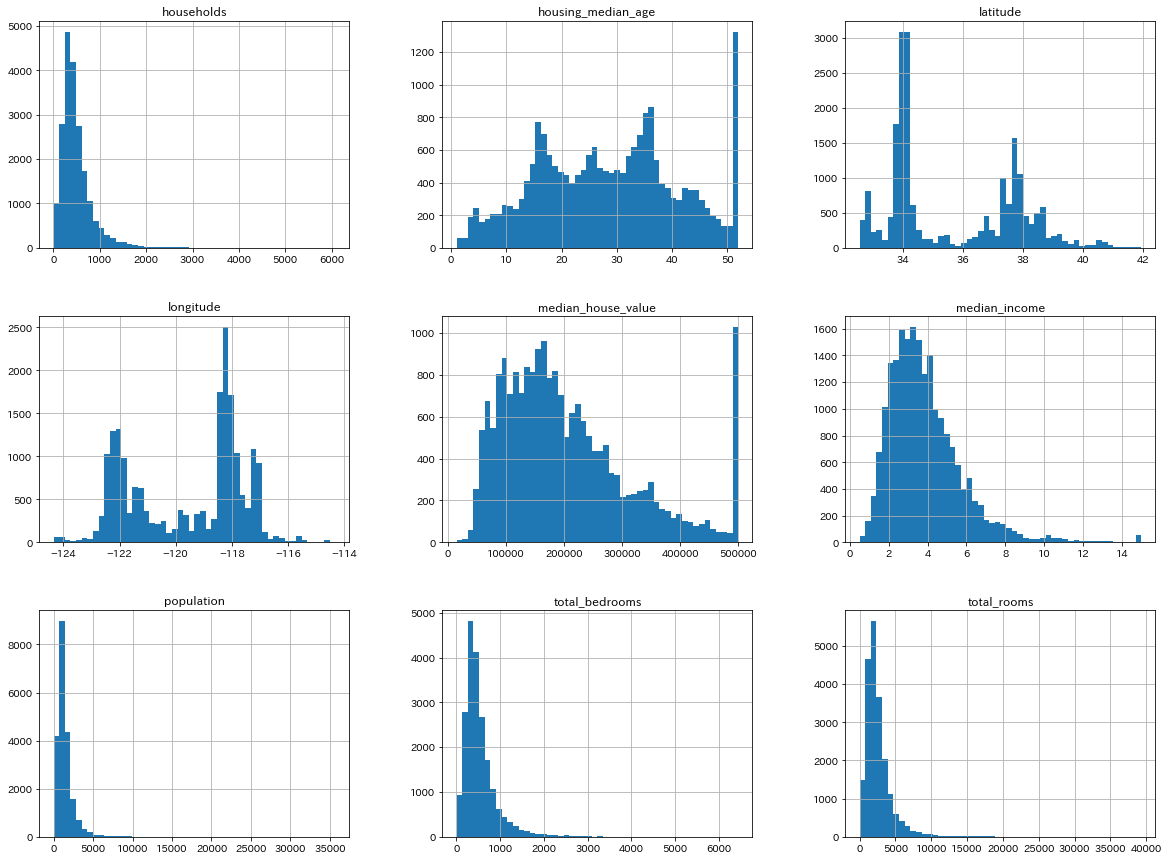

In [10]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

ヒストグラムから気付くことがいくつかある。
1. まず第1に、収入の中央値(median_income)は米ドルで表現されていないように見える。データを収集したチームと協力してチェックすると、値をスケーリングした上で、上限を15(実際には15.0001)、下限は0.5(実際には0.4999)に切ってあるという。機械学習では、前処理済みの属性を使うのはごく普通のことであり、必ずしも問題ではないが、データがどのように計算されたかは理解しておくようにしたい。
2. 築年数の中央値と住宅価格の中央値も上限を切ってある。後者はターゲット属性（ラベル）なので、特に重大な問題である。価格がその限界を越えないことを機械学習アルゴリズムが学習してしまう恐れがある。これが問題かどうかはクライアントチーム（あなたのシステムの出力を使うチーム）と協力してチェックする必要がある。50万ドルを越えても正確な予測が必要だということであれば、選択肢はふたつある。
    1. 上限を超えている区域の正しいラベルを集める。
    2. 訓練セットからそれらの区域を取り除く（50万ドルを越える値を予測したときにシステムの評価が下がるので、テストセットからも取り除く）
3. これらの属性は、スケールがまちまちである。この問題については、この章のあとの方で特徴量のスケーリングを扱うときに説明する。
4. 最後に、多くのヒストグラムが**テールヘビー**(tail heavy)になっている。つまり、中央値の左側よりも右側が大きく広がっている。このような形になっていると、一部の機械学習アルゴリズムはパターンを見つけにくくなることがある。そういった属性については、あとでベル型の分布に近づくように変換する。

これで、あなたが扱うデータがどのようなものなのかについてかなり理解が深まったはずだ。

## 2.3.4 テストセットを作る

この段階でデータの一部を自発的に取り分けて封印するのは奇妙な感じがするかもしれない。データはまだざっと見てみただけであり、どのアルゴリズムを使うべきかを決める前にデータについてもっと多くのことを学んでおくべきではないのだろうか。確かにそうだが、人間の脳は恐るべきパターン検出能力システムであり、過学習の恐れである。テストセットを見ると、思いがけず面白そうなパターンが見つかり、そのために特定のタイプの機械学習モデルを選ぶように誘導されるかもしれない。そのようなテストセットを使って汎化誤差を推定すると、推定が楽観的になりすぎ、期待通りの性能を発揮できないシステムを本稼働させることになってしまう。これを**データスヌーピングバイアス**(data snooping bias: データの盗み見によって入る偏見)と呼ぶ。

テストセットの作成は、理論的にはごく単純な話だ。無作為に一部のインスタンス（一般的にはデータセットの20%）を取り出し、それを見ないように封印することだ。

In [11]:
import numpy as np

In [12]:
def split_train_test(data, test_radio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_radio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

そして、この関数を次のようにして使う。

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


これでテストセットを作ることはできるが、完璧ではない。プログラムを1度実行すると、別のテストセットが作られてしまう。これを繰り返していると、あなた（あなたの機械学習アルゴリズム）はデータセット全体を見てしまう。このようなことは避けなければならない。

この問題は、たとえば最初のランで使ったテストセットを保存し、その後のランでもそれをロードすれば解決できる。あるいは、np.random.permutation()を呼び出す前に乱数生成器の種を設定し（たとえば、np.random.seed(42))、いつも同じ結果が生成されるようにする方法もある。

しかし、これらふたつの解決方法は、次に更新されたデータセットをフェッチした瞬間に破綻する。そこでよくつかわれているのは、各インスタンスの識別子を使って（インスタンスが一意で変更されない識別子を持っていることが前提となる）、インスタンスがテストセットに属すべきものかどうかを判断する方法である。たとえば、各インスタンスの識別子のハッシュを計算し、ハッシュの最後のバイトだけを保存して、この値が51(256の20%)以下ならインスタンスをテストセットに送る。こうすれば、データセットをリフレッシュしても、テストセットは複数のランを通じて一定に保たれる。新しいテストセットには、新しいインスタンスの20%が含まれるが、以前訓練ゼットに含まれていたインスタンスはいっさい入り込まない。実装例を次に示していこう。

In [14]:
import hashlib

In [15]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

しかし、住宅価格データセットには、識別子の列がない。そのような場合、もっとも単純な方法は、列番号をIDにすることだ。

In [16]:
housing_with_id = housing.reset_index() # ID列を追加する
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

行番号を一意な識別子として使う場合には、新データはデータセットの末尾に追加されるようにして、行が削除されないようにしなければならない。そのようなことはできないという場合には、一意な識別子を作るためのもっと安定した方法を試してみるとよいだろう。たとえば、区域の緯度と経度は数百万年は安定していることが保証されている。そこで、次のようにしてふたつの値を組み合わせればよい。

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

scikit-learnには、さまざまな方法でデータセットを複数のサブセットに分割する関数がいくつか含まれている。もっとも単純なのは、先ほど定義したsplit_train_testとほぼ同じことを行うが、ふたつの機能が追加されているtrain_test_splitである。追加機能のひとつは、先ほどの説明のように乱数生成器の種を設定するrandom_state引数、もうひとつは複数のデータセットに同じ行番号を与え、同じインデックスでデータセットを分割する機能である（これはラベルのために別個のDataFrameがあるときなどに非常に役立つ）。

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

さて、今まで説明してきたのは、純粋に無作為なサンプリング方法である。データセットが十分大規模ならそれでよいのだが（特に属性数との相対的な割合で）、そうでなければ、大きなサンプリングバイアスを持ち込む危険がある。たとえば、調査会社が1,000人の人に電話をかけて質問するときは、電話帳で無作為に1,000人の人々を拾い出すわけではない。人口全体を代表するような1,000人になるように努力する。たとえば、米国の人口は女性が51.3%、男性が48.7%なので、ていねいに実施されている調査では、サンプルでも同じ比率を守ろうとする。つまり、513人の女性と487人の男性に尋ねるのである。これは、**層化抽出法**(stratified sampling)とよばれている。人口全体を**層**(stratum)と呼ばれる同種の下位集団に分割し、各層から適切な数のインスタンスをサンプリング抽出し、テストセットが人口全体の代表になるようにするのである。純粋に無作為なサンプリングを使うと、12%の確率で、女性が49%よりも少なく、54%よりも多い歪んだ検証セットをサンプリングしてしまう。どちらの場合でも、調査結果は大きくバイアスがかかったものになるだろう。

さて、専門家と話してみたところ、収入の中央値は、住宅価格の中央値を予測する上で非常に需要な属性だと言われたとする。テストセットは、データセット全体のさまざまな収入カテゴリを代表するものにしたいところだ。収入の中央値は連続的な数値属性なので、まず、収入カテゴリという属性を新たに作る必要がある。収入の中央値のヒストグラムをもっとよく見てみよう。収入の中央値の大半は、2～5万ドルの周辺に集まっているが、一部の値は6万ドルを大きく越えている。データセットの各層に十分な数のインスタンスがあることが重要で、そうでなければ層を重視することがバイアスになってしまう。つまり、層の数が多くなり過ぎなりすぎないようにしなければならないし、各層は十分に大きくなければならない。次のコードは、収入の中央値を1.5%で割り（収入カテゴリの数を減らすため）、ceilで端数を切り上げ（離散したカテゴリを作るため）て、5以上のカテゴリをすべて5にまとめるという方法で収入カテゴリ属性を作る。

In [20]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

これらの収入カテゴリは次図で表している。

これで収入カテゴリに基づき、層化抽出をする準備を整った。scikit-learnのStratifiedShuffleSplitクラスを使えばよい。

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

テストセットで収入カテゴリごとの割合を見ることができるようになった。

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

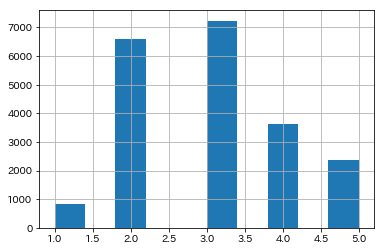

In [24]:
housing["income_cat"].hist()

同じようなコードを使って、データセット全体の収入カテゴリの割合も調べることができる。次図は、データセット全体、層化抽出法を使って生成したテストセット、無作為抽出で生成したテストセットで、収入カテゴリごとの割合を比較したものである。ご覧のように、層化抽出法で生成したテストセットの収入カテゴリごとの割合はデータセット全体の割合とほぼ同じだが、無作為抽出で生成したテストセットではかなり歪みが出ている。

In [25]:
test_set["income_cat"] = np.ceil(test_set["median_income"] / 1.5)
test_set["income_cat"].where(test_set["income_cat"] < 5, 5.0, inplace=True)

overall_ratio = housing["income_cat"].value_counts() / len(housing)
random_ratio = test_set["income_cat"].value_counts() / len(test_set)
stratified_ratio = strat_test_set["income_cat"].value_counts() / len(strat_test_set)


pd.DataFrame({
    'Overall': overall_ratio,
    'Random': random_ratio,
    'Stratified': stratified_ratio,
    'Rand. %error': (overall_ratio - random_ratio) * 100,
    'Stratified %error': (overall_ratio - stratified_ratio) * 100
}).sort_index()

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\pandas\core\generic.py:8672: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Overall,Random,Stratified,Rand. %error,Stratified %error
1.0,0.039826,0.040213,0.039729,-0.038760,0.009690
2.0,0.318847,0.324370,0.318798,-0.552326,0.004845
3.0,0.350581,0.358527,0.350533,-0.794574,0.004845
4.0,0.176308,0.167393,0.176357,0.891473,-0.004845
5.0,0.114438,0.109496,0.114583,0.494186,-0.014535


ここでincome_cat属性を取り除き、データを元の状態に戻しておこう。

In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

テストセットの生成のためにかなりの時間を使ったが、それには十分な理由があった。これは無視されがちだが、機械学習プロジェクトのきわめて重要な部分である。さらに、この考え方の多くは、あとで交差検証を取り上げるときにも使われる。では、データの探索という次のステージに移ることにしよう。

## 2.4 洞察を得るためにデータを研究、可視化する

今までは、操作しようとしているデータがどのような種類のものかをざっくりと理解するためにデータをちらっと見ただけであった。ここでは、もう少し深くデータを理解することが目標になる。

まず、テストセットは封印して、訓練セットだけを探るようにしなければならない。また、訓練セットが非常に大きい場合には、素早く簡単に操作できるように、探索セットを抽出すべきだ。私たちの場合、訓練セットはごく小規模なものなので、フルセットを直接操作してよい。それでは、訓練セットを壊さずにデータを探索するために、訓練セットのコピーを作っておこう。

In [27]:
housing = strat_train_set.copy()

## 2.4.1 地理データの可視化

地理情報（緯度と経度）が含まれているので、データを可視化するために、すべての区域の散布図を作ってみてもよい。

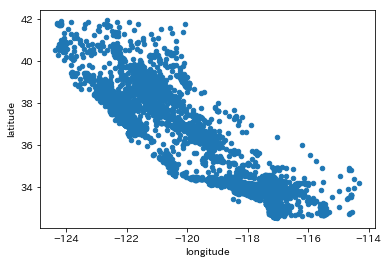

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")

確かにカリフォルニアだということはわかるが、それ以外、特別なパターンを見つけるのは難しい。alphaオプションに0.1を設定すると、データポイントの密度が高い場所が可視化しやすくなる。

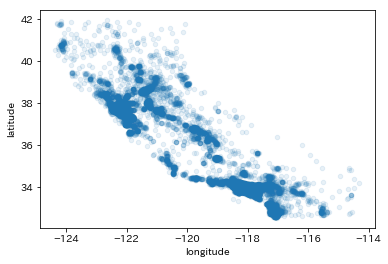

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

これでだいぶよくなった。高濃度の地域、すなわちベイエリアとロサンゼルス、サンディエゴ、特にサクラメントとフレズノを中心とするセントラルバレーがはっきりとわかる。

より一般的に言えば、人間の脳は画像からパターンを見つけ出すことがとても得意だが、パターンが目立つようにするには、可視化パラメータを操作しなければならない場合がある。

では、次に住宅価格を見てみよう。個々の円の半径は区域の人口を表し（sオプション)、色は価格を表す（cオプション）。jetと呼ばれる定義済みのカラーマップ（cmapオプション）を使用する。青（低い値）から赤（高い値）までの範囲とする。

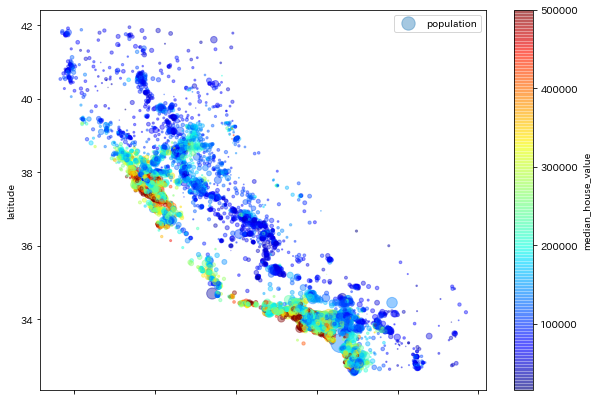

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()

## 2.4.2 相関を探す

データセットがそれほど大きくないので、corr()メソッドを使ってすべての属性のペアに関して**標準相関関数**(standard correlation coefficient、または**ピアソンのr**: Peason's r)を計算するのは簡単だ。

In [35]:
corr_matrix = housing.corr()

では、個々の属性と住宅価格の中央値にどの程度の相関があるかを見てみよう。

In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

相関関数は、-1から1までの範囲である。1に近ければ、強い正の相関があるという意味になる。たとえば、収入の中央値が高くなると、住宅価格の中央値も高くなりやすい。それに対し、係数が-1に近くなると、強い負の相関になる。経度と住宅価格の中央値の間には弱い負の相関があることがわかる（つまり、北に向かうと、住宅価格はわずかに下がる傾向がある）。そして、係数が0に近い時には、線形相関はない。

属性間の相関は、Pandasのscatter_matrix関数でもチェックできる。この関数は、すべての数値属性とほかのすべての数値属性の間の関係を描き出す。数値属性は11個あるので、$11^2=121$種類のプロットが作られるが、それではページに収まりきらないので、住宅価格の中央値ともっとも相関が高い一部の属性だけに注目することにしよう。

In [37]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191B7D25B70>,
      dtype=object)

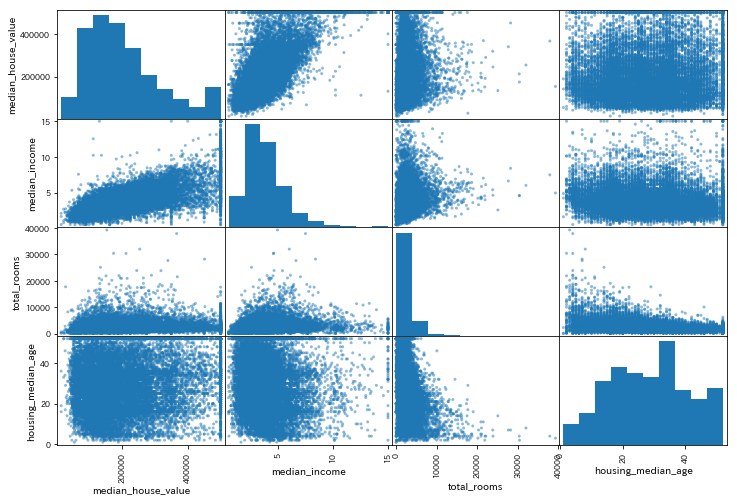

In [38]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

主対角線（左上から右上）は、同じ変数どうしの相関を書いても直線が並ぶだけなので、意味がない。そこで、Pandasは各属性のヒストグラムを表示している（ほかのオプションもある）。詳しくは、Pandasのドキュメントを参照していただきたい。

住宅価格の中央値を予測するためにもっとも使える値は収入の中央値なので、その相関を表す散布図を大きく表示しよう。

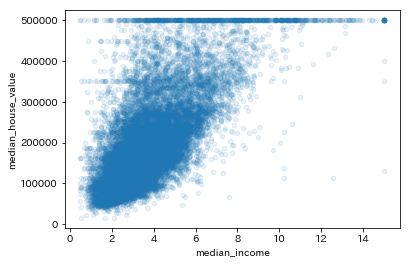

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

この図からはいくつかのことがわかる。まず第1に、相関が本当に非常に強いことである。上向きの傾向がはっきりと表れ、点はあまり散らばっていない。第2に、以前触れた価格の上限の設定が、50万ドル近辺の横線にはっきりと現れている。しかし、この図には、これよりも少し目立たない直線もある。45万ドル付近の横線、35万ドル付近の横線、そして28万ドル付近にもおそらく横線があり、それよりも低いところにも横線がある。アルゴリズムがこのようなデータの癖を再現しないように、対応する区域を訓練セットから取り除くようにしたい。

## 2.4.3 属性の組み合わせを試してみる

前節では、データを探索して洞察を得るためのいくつかの方法がわかったことだろう。また、機械学習アルゴリズムにデータを与える前にクリーンアップしておきたいデータの癖も見つかった。そして、属性間、特にターゲット属性とその他の属性の間に面白い相関関係を見つけることができた。さらに、一部の属性にはテールヘビーな分布があることもわかったので、そのような属性は変換したい（たとえば、対数を計算して）。もちろん、プロジェクトによってどこまでわかるかは大きくことなるが、一般的な考え方はほぼ同じである。

機械学習アルゴリズムに渡せるようにデータを実際に準備する前に、最後にしておきたいことがもうひとつある。さまざまな属性を結合してみることだ。たとえば、区域の部屋数の合計がわかっても、区域の世帯数がいくつかがわからなければあまり意味はない。本当に知りたいのは、世帯あたりの部屋数である。同様に、寝室の総数もそれ自体では意味がない。部屋数と比較してみたいはずだ。そして、世帯あたりの人数も、面白そうな属性の組み合わせ方である。こういった新属性を作ってみよう。

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

改めて相関行列を見ると、次のようになる。

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

新設のbedrooms_per_room属性の方が、部屋数や寝室数よりも住宅価格の中央値に対して高い相関関係を持っている。寝室数/部屋数の割合が低い家の方が値段が高くなる傾向があるのは明らかだ。また、世帯あたりの部屋数の方が、区域の部屋数の合計よりも意味のある情報になっている。当然ながら、家が大きければ大きいほど、値段も高くなるはずだ。

データ探索のこの部分は、徹底的なものである必要はない。ポイントは、よい出発点を見つけて、早く洞察をつかみ、最初のプロトタイプとして十分によいものを手に入れることだ。しかし、この部分は反復的なプロセスになる。プロトタイプを動かしてその出力を分析すると、さらに洞察が得られ、そこからこの探索ステップに戻ってくることがある。

## 2.5 機械学習アルゴリズムに渡せるようにデータを準備する

では、機械学習アルゴリズムのためにデータを準備しよう。次のような理由から、マニュアルで準備するのではなく準備作業をする関数を作りたいところだ。
- 関数を作れば、どのデータセットに対しても簡単に変換を再現できる（たとえば、次に新しいデータセットを得たとき）
- 次第に将来のプロジェクトで再利用できる変換関数のライブラリが整備されていく
- 本番システムでこれらの関数を使えば、新しいデータをアルゴリズムに与える前に変換できる。
- さまざまな変換方法を試し、どの組み合わせがもっともうまく機能するかを簡単に試せるようになる。

しかし、まず最初にクリーンな訓練セットに戻した上で（strat_train_setをコピーして）、予測子とラベルを分けておこう。かならすしも、予測子とターゲット値にまったく同じ変換をかけるわけではないのである（drop()はデータのコピーを作るので、strat_train_setに影響を与えないことに注意しよう）。

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## 2.5.1 データをクリーニングする

ほとんどの機械学習アルゴリズムは欠損特徴量を処理できないので、それに対応するための関数を作っておこう。先ほど気付いたように、total_bedrooms属性には欠損値があるので、それに対処するのである。選択肢は3つある。
- オプション1: 対応する区域を取り除く。
- オプション2: 属性全体を取り除く。
- オプション3: 何らかの値を設定する（0、平均値、中央値など）

DataFrameのdropna()、drop()、fillna()メソッドを使えば、こっらは簡単に実現できる。

In [43]:
housing.dropna(subset=["total_bedrooms"])   # オプション1
housing.drop("total_bedrooms", axis=1)      # オプション2
median = housing["total_bedrooms"].median() # オプション3]
housing["total_bedrooms"].fillna(median, inplace=True)

オプション3を選ぶ場合、訓練セットの中央値を計算し、それを訓練セットの欠損値に入れていくが、計算した中央値自体も忘れずに保存しておこう。あとで、システムを評価したくなったときに、欠損値をその値に置き換えなければならない。また、システムが本番稼働したときには、新しいデータの欠損値を置き換えるためにやはりその値を使う。

scikit-learnが欠損値をうまく処理してくれるImputerというクラスを持っているので、使い方を説明しよう。まず、各属性の欠損値をその属性の中央値で置き換えることを指定して、Imputerのインスタンスを作る。

In [44]:
from sklearn.preprocessing import Imputer

In [45]:
imputer = Imputer(strategy="median")

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


中央値は数値属性でなければ計算できないので、テキスト属性のocean_proximityを取り除いたデータのコピーを作る必要がある。

In [46]:
housing_num = housing.drop("ocean_proximity", axis=1)

fit()メソッドを使えば、訓練データにimputerインスタンスを適合させられる。

In [47]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

imputerはすでに個々の属性の中央値を計算し、statistics_インスタンスに結果を格納している。欠損値があったのはtotal_bedroomsだけだったが、システムが本番稼働したあとでやってくる新しいデータにほかの欠損値がふくまれていないという保証はないので、すべての数値属性にimputerを適用しておいた方が安全だ。

In [48]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [49]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

このように「訓練した」imputerを使い、欠損値を学習した中央値に置き換えて訓練セットを変換する。

In [50]:
X = imputer.transform(housing_num)

結果は、変換された特徴量を格納するNumpy配列である。この値は、簡単にPandasのDataFrameに戻せる。

In [51]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## 2.5.2 テキスト/カテゴリ属性の処理

先ほど、テキスト属性であるために中央値を計算できないocean_proximity属性を取り除いた。

In [52]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

いずれにしても、ほとんどの機械学習アルゴリズムは数値属性の方が操作しやすいので、テキストラベルを数値に変換しよう。このために、Pandasのfactorize()関数を使って、各々のカテゴリを異なる数値へとマッピングすることができる。

In [53]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

この方がよい。housing_cat_encodedは純粋な数値データである。factorize()メソッドはカテゴリのリストも返す(<1H OCEANは0にマップされ、NEAR OCEANは1にマッピングされた）。

In [54]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

この表現には、MLアルゴリズムが近接した値は離れた値よりも近いと勘違いするという問題がある。もちろん、値にそんな意味はない（たとえば、カテゴリ0とカテゴリ4は、カテゴリ0とカテゴリ2よりも近い）。この問題を解決するための方法としてよく使われているのは、カテゴリごとに1個のバイナリ属性を作るというものだ。カテゴリが<1H OCEANならある属性を1にする（そうでなければ0にする）。1個の属性だけが1(ホット)になり、他の属性はすべて0(コールド)になるので、これを**ワンホットエンコーディング**(one-hot encoding)と呼ぶ。

sckit-learnは、整数のカテゴリ値をワンホットベクトルに変換するOneHotEncoderエンコーダを提供している。それでは、このカテゴリをワンホットベクトルにエンコードしてみよう。

In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

fit_transform()が受けつけるのは2次元配列だが、housing_cat_encodedが1次元配列なので、形状変換が必要である。また、出力がNumPy配列ではなくSciPyの疎行列(sparse matrix)だということに注意しよう。これは、数千ものカテゴリを持つカテゴリ属性が含まれているようなときには、とても役立つ。ワンホットエンコーディングを実行したあとにえられる行列には数千もの列があり、1行あたり1個の1を除けば0の山だ。ほとんど0の情報を格納するために膨大なメモリを消費するのは無駄なので、疎行列は0以外の要素の位置だけを格納する。疎行列は通常の2次元配列とほとんど同じように使えるが、NumPyの(密)号列に変換したいときには、toarray()を呼び出せばよい。

In [56]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## 2.5.3 カスタム変換

scikit-learnは役立つ変換器をたくさん提供しているが、カスタムクリーンアップや特定の属性の結合のようなタスクでは、独自の変換器を書く必要がある。独自変換器でも、scikit-learnの機能(たとえばパイプライン)をシームレスに使えるようにしたいところだが、scikit-learnは継承ではなくダックタイピングに依拠しているので、クラスを作ってfit() (selfを返すようなもの)、transform()、fit_transform()の3つのメソッドを実装するだけでそのような変換器を作れる。そして、あとのふたつのメソッドは、TransformerMixinを基底クラスに追加すれば、それだけで手に入る。次に示すのは、以前説明した寝室数と部屋数を結合した属性を追加するための小さな変換器クラスの例である。

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

In [60]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args, **kargsなし
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # ほかにすることなし
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

この例では、変換器は、デフォルトでTrueがセットされたadd_bedrooms_per_roomというハイパーパラメータを持っている（妥当なデフォルトを用意しておくと役立つことが多い）。このハイパーパラメータがあると、機械学習アルゴリズムによってこの属性を追加した方がよいかどうかを簡単に調べられる。一般に、ハイパーパラメータを追加すれば、自分では100%の確信を持てないデータ準備のステップをオン/オフできるようになる。データ準備ステップの自動化を進め、自動的に試せる組み合わせを増やせば増やすほど、すばらしい組み合わせを見つけられる可能性が高くなる（そして、多くの時間の節約につながる）。

## 2.5.4 特徴量のスケーリング

データに対して実行しなければならない変換のなかでも特に重要なもののひとつが**特徴量のスケーリング**(feature scaling)である。ごく一部の例外を除き、機械学習アルゴリズムは、入力の数値属性のスケールが大きく異なると性能を発揮できない。住宅価格データにもこれは当てはまる。総部屋数は6から39,320までの大きな範囲になっているのに、収入の中央値は0から15までの範囲である。なお、ターゲット値のスケーリングは一般に不要だということに注意していただきたい。

すべての属性のスケールを統一するためによく使われている方法としては、**最小最大スケーリング**(min-max scaling)と標準化(standarization)のふたつがある。

最小最大スケーリング(多くの人々はこれを**正規化**: normalizationと呼んでいる)は、ごく単純な方法で、0から1までに収まるように値をスケーリングし直すだけである。値から最小値を引き、最大値と最小値の差で割ればよい。scikit-learnは、この目的のためにMinMaxScalerという変換器を提供している。また、何らかの理由で範囲を0から1までにしたくないときに範囲を変えられるfeature_rangeハイパーパラメータもある。

標準化はこれと大きく異なる。まず、値から平均値を引き(そのため、標準化された値の平均はかならず0になる)、その値を分散で割って得られる分布が単位分散になるようにする。最小最大スケーリングとは異なり、標準化には上下限がなく、特定の範囲には収まらないので、一部のアルゴリズムではそれが問題になる（たとえば、ニューラルネットワークは、入力値が0から1までの間の範囲に収まっていることを前提とすることが多い)。しかし、標準化は最大最小スケーリングよりも外れ値の影響が小さくなる。たとえば、ある区域の収入の中央値が100だとする(なんかの間違いにより)。この場合、最小最大スケーリングでは0から15までの範囲のほかの値は0から0.15までの範囲に押し込まれてしまうが、標準化ならそのような大きな影響は出ない。scikit-learnは標準化のためにStandardScalerという変換器を用意している。

## 2.5.5 変換パイプライン

今までの説明からもわかるように、データ変換のステップはいくつもあり、それを正しい順序で実行しなければならない。幸い、scikit-learnには、そのような変換シーケンスを実行しやすくするPipelineクラスがある。次に示すのは、数値属性のための小さなパイプラインである。

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [62]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipelineのコンストラクタは、引数として、変換ステップのシーケンスを定義する名前/推定器のペアのリストを取る。最後の推定器以外は、変換器でなければならない(つまり、fit_transform()メソッドを持たなければならない)。名前は何でも好きなもの(ダブルアンダースコア"__"を含まない限り)でよい。

パイプラインのfit()メソッドを呼び出すと、すべての変換器のfit_transform()が逐次的に呼び出される。このとき、引数として前の呼び出しの出力が渡される。そして、最後の推定器と同じメソッドを外から呼び出せるようにする。この例では、最後の推定器は変換器でもあるStandardScalerなので、パイプラインはシーケンスに含まれるすべてのデータ変換を適用するtransform()メソッドを持つ(fit()を呼び出してからtransform()を呼び出す代わりに使えるfit_transformメソッドもある)。

今、パイプラインに直接Pandasの数値以外のカラムを含んでいるDataFrameを与えることができると良い。そうすると、数値のカラムを手作業でNumPy配列へ抽出する必要はなくなる。scikit-learnには、PandasのDataFrameを処理する機能はないが、簡単なカスタム変換器を書くことができる。

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

In [64]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self;
    def transform(self, X):
        return X[self.attribute_names].values

DataFrameSelectorは必要な属性を選択し、残りを破棄し、DataFrameの結果をNumPy配列に変換することでデータを変換する。これにより、PandasのDataFrameを利用し、数値のみを処理するパイプランを簡単に書くことができる。そのパイプラインは数値属性のみを選択するDataFrameSelectorで始まり、以前に議論した前処理のステップが続く。また、DataFrameSelectorを利用してカテゴリ属性を選択し、次にCategoricalEncoderを適用するだけで、LabelBinarizerを適用するカテゴリ属性用の別のパイプラインを簡単に書くことができる。

In [69]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder()),
])

C:\Users\s.takai\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


これら2つのパイプラインをどのように1つのパイプラインに統合するのだろう。？答えは、scikit-learnのFeatureUnionクラスを利用することだ。変換器のリスト(変換器パイプライン全体になり得る)にそのクラスを与えるtransform()メソッドが呼び出されると、各変換器のtransform()メソッドが並列に実行され、各々の出力を持ち、結合したうえで結果を返す(そして、もちろん、fit()メソッドは各変換器のfit()メソッドを呼び出す)。数値とカテゴリの属性双方を処理するパイプライン全体は次のようになる。

In [70]:
from sklearn.pipeline import FeatureUnion

In [71]:
full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

そして、パイプライン全体は、次のようにすれば実行できる。

In [72]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

In [73]:
housing_prepared.shape

(16512, 16)

## 2.6 モデルを選択して訓練する

ついにここまで来た。今までに、問題を構成し、データを入手して探索し、機械学習アルゴリズムのためにデータを自動的にクリーンアップ、準備する変換パイプラインを書いてきて、ついに機械学習モデルを選択、訓練する準備が整ったのである。

## 2.6.1 訓練セットを訓練、評価する

今までのステップのおかげで、みなさんが思っているのと比べて仕事ははるかに単純になっている。まず、全章で行ったように、線形回帰モデルを訓練してみよう。

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

これで終わりだ。使える線形回帰モデルがもう作られている。訓練セットの一部のインスタンスで試してみましょう。

In [77]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60465172 317768.80712827 210956.4332437   59218.98859509
 189747.55851241]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


予測は正確だとは言えないが、動作はしている(たとえば、第1の予測は実際の値の2/3程度である)。scikit-learnのmean_squared_error関数を使ってこの回帰モデルの訓練セット全体に対するRMSEを測定してみよう。

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

これは何もないよりはいいかもしれないが、決してすばらしい成績ではない。ほとんどの区域のmedian_housing_valuesは、120,000ドルと265,000ドルの間なので、68,628ドルの予測誤差は満足できる水準ではない。これは、訓練データに過小適合しているモデルの例である。このようになるのは、特徴量がよい予測ができるほどの情報を提供していないか、モデルの性能が低いということだ。前章でも説明したように、過小適合を解決するための王道はより強力なモデルを選ぶか、訓練アルゴリズムによりよい特徴量を与えるか、モデルの制約を緩めるかである。このモデルは正則化されていないのｄ、最後の選択肢はなくなる。特徴量を増やすこともできるが(たとえば、人口のログ)、まずはより複雑なモデルを試してみることにしよう。

DecisionTreeRegressorを訓練してみることにする。これはデータに含まれる複雑な非線型の関係も見つけられる強力なモデルである(決定木は6章で詳しく説明する)。コードは次のようなものになる。

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

モデルを訓練したので、訓練セットで評価してみよう。

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

え、誤差なし?このモデルが本当にそんなに完全なものになることがあるのだろうか。もちろん、モデルがデータに過学習している可能性の方がはるかに高い。どうすれば、それを確かめられるだろうか。自信の持てるモデルを本番稼働する準備が整うまではテストセットに手を付けたくないので、訓練セットの一部を訓練、一部を検証のために使う必要がある。

## 2.6.2 交差検証を使ったよりよい評価

決定木モデルを評価するためのひとつの方法は、train_test_split関数を使って訓練セットを小さな訓練セットと検証セットに分割し、小さいほうの訓練セットでモデルを訓練して検証セットで評価するものだ。少し手間だが、難しすぎるようなことはいっさいなく、うまく機能する。

もうひとつの優れた方法は、scikit-learnの**交差検証**(cross-validation)である。次のコードは**k分割交差検証**(K-fold cross-validation)を行う。つまり、訓練セットを**フォールド**(fold)と呼ばれる10個の別々のサブセットに無作為に分割し、1個のフォールドを評価用に残し、その他9個のフォールドで訓練して、決定木モデルを10回訓練、評価するのである。結果は、10個の評価スコアから構成されたベクトルになる。

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sort(-scores)

結果を見てみよう。

In [85]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [86]:
display_scores(tree_rmse_scores)

Scores:  [4.45564865e+09 4.64607994e+09 4.72116154e+09 4.86011396e+09
 4.96732711e+09 5.00916975e+09 5.20246224e+09 5.20618130e+09
 5.67880375e+09 6.04773578e+09]
Mean:  5079468402.29618
Standard deviation:  458140003.20922124


このように評価すると、決定木は先ほどよりも優れたものではないように見える。それどころか、線形回帰モデルよりも性能が低いようだ。交差検証を使えば、モデルの性能の推定だけではなく、推定がどれだけ正確か(すなわち、標準偏差)も測定できる。決定木のスコアは71,379で、一般に±2,458の幅がある。ひとつの検証セットを使っただけでは、この情報は得られない。しかし、交差検証にはモデルを何度も訓練するコストがかかるため、いつもできるとは限らない。

念のため、線形回帰モデルでも同じスコアを計算してみよう。

In [89]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73844055 66960.11805903 70347.95242143 74739.57053173
 68031.13388523 71193.84183496 64969.63057264 68281.61137975
 71552.91568634 67665.1008085 ]
Mean:  69052.46136201518
Standard deviation:  2731.6740043252503


やっぱりそうだ。決定木モデルは過学習の度合いがひどく、線形回帰モデルよりもかえって性能が低い。

最後にあとひとつ、RandomForestRegressorモデルを試してみよう。7章で詳しく説明するが、ランダムフォレストは特徴量の無作為なサブセットを使って多数の決定木を訓練し、それらの予測の平均を取る。ほかの多数のモデルを基礎としてモデルを構築することで**アンサンブル学習**(ensemble learning)と呼び、MLアルゴリズムの性能を上げる優れた方法になることが多い。

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [92]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [93]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean:  52583.72407377466
Standard deviation:  2298.353351147122


これはすいぶん成績がよくなっている。ランダムフォレストはとても有望に見える。しかし、訓練セットに対する成績が検証セットに対する成績よりもかなり低くなっていることに注意しなければならない。これは、このモデルがまだ過学習しているということだ。過学習の解決方法は、モデルを単純化するか、モデルに制限を加える(つまり正則化する)か、訓練データを大幅に増やすかである。しかし、ランダムフォレストに深入りしてハイパーパラメータの調整に時間を掛けすぎてしまう前に、機械学習のアルゴリズムのさまざまなカテゴリの属するほかの多くのモデルを試してみる必要がある(異なるカーネルによる複数のSVM: サポートベクトルマシンやニューラルネットワークなど)。目標は、少数(2個から5個)の期待できるモデルのリストを作ることだ。

## 2.7 モデルを微調整する

期待できそうなモデルのリストができたとする。次にこれらのモデルを微調整していく必要がある。そのための方法をいくつか見ていこう。

## 2.7.1 グリッドサーチ

ひとつの方法は、最適なハイパーパラメータ値の組み合わせを見つけるまで、マニュアルでハイパーパラメータを操作するものである。これはかなり面倒な作業であり、多くの組み合わせを試す時間はないかもしれない。

そこで、scikit-learnのGridSearchCVにサーチをさせればよい。どのハイパーパラメータを操作するか、その値として何を試すかを指定すると、GridSearchCVは、指定から得られるハイパーパラメータ値のすべての組み合わせを交差検証で評価する。たとえば、次のコードは、RandomForestRegressorのハイパーパラメータ値の最高の組み合わせを探す。

In [94]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

このparam_gridは、まず最初のdictに含まれるn_estimators、max_featuresは、ハイパーパラメータ(今の段階では、これらのハイパーパラメータの意味はわからなくてよい。7章で詳しく説明する)の3×4=12通りの組み合わせを評価してから、第2のdictのハイパーパラメータの2×3=6通りの組み合わせを評価する。ただし、2度目の評価では、bootstrapにデフォルトのTrueではなく、Falseをセットする。

結論としては、このグリッドサーチは、RandomForestRegressorのハイパーパラメータの12+6=18通りの組み合わせで、個々のモデルを5回ずつ訓練する(5フォール度の交差検証を使っているため)。言い換えれば、18×5=90ラウンドの訓練を行う。かなり時間がかかるかもしれないが、処理終了後に次のようにすれば、最高のパラメータの組み合わせがわかる。

In [99]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

また、次のようにすれば最良の推定器を直接得ることができる。

In [100]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

そしてもちろん、評価のスコアもわかる。

In [104]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63707.06490581047 {'max_features': 2, 'n_estimators': 3}
56069.99091064874 {'max_features': 2, 'n_estimators': 10}
53062.0400705833 {'max_features': 2, 'n_estimators': 30}
60046.319982892106 {'max_features': 4, 'n_estimators': 3}
52529.0710297466 {'max_features': 4, 'n_estimators': 10}
50576.337742728865 {'max_features': 4, 'n_estimators': 30}
59222.28418435965 {'max_features': 6, 'n_estimators': 3}
52206.42867740385 {'max_features': 6, 'n_estimators': 10}
49951.40340514696 {'max_features': 6, 'n_estimators': 30}
58559.18087661011 {'max_features': 8, 'n_estimators': 3}
52360.02588709459 {'max_features': 8, 'n_estimators': 10}
50182.49486706011 {'max_features': 8, 'n_estimators': 30}
63106.18493636126 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54600.00678511752 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60979.308884352984 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52226.91233466038 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

この例では、max_featuresハイパーパラメータに8、n_estimatorsハイパーパラメータに30を設定したときの最良のソリューションが得られる。この組み合わせのRMSEスコアは49,694で、デフォルトのハイパーパラメータ値を使ったときのスコア(52,564)よりも少しよくなっている。おめでとう、あなたの最良のモデルをうまく微調整できたのだ。

## 2.7.2 ランダムサーチ

グリッドサーチは、前の例のように比較的少ない数の組み合わせを探るときにはよいが、ハイパーパラメータの**探索空間**(search space)が大きいときには、代わりにRandomizedSearchCVを使った方がよい場合が多い。このクラスはGridSearchCVクラスと同じように使えるが、すべての組み合わせを試すのではなく、指定された回数だけ個々のハイパーパラメータのためにランダムな値を選び、それらを組み合わせて評価する。このアプローチは、大きなメリットがふたつある。
- ランダムサーチをたとえば1,000回繰り返すと、個々のハイパーパラメータについて1,000種類の異なる値を試せる(グリッドサーチのようにハイパーパラメータごとに数個の値だけを試すのではなく)。
- ハイパーパラメータサーチのための計算資源の予算を管理しやすくなる。単純にイテレーションの回数を設定するだけでよい。

## 2.7.3 アンサンブルメソッド

性能のよいモデルを組み合わせてみるというのも、システムを微調整する方法のひとつだ。グループ「アンサンブル」は、個別の最良のモデルよりも高い性能を発揮することが多い(決定木を組み合わせたランダムフォレストが個別の決定木よりも高い性能を発揮するように)。特に、個別のモデルが大きく異なるタイプの誤差を出すときには効果が高い。7章で詳しく説明する。

## 2.7.4 最良のモデルと誤差の分析

最良のモデルをよく調べてみると、問題について深い洞察が得られることがよくある。たとえば、RandomForestRegressorは、正確な予測のために個々の属性の相対的な重要性の大小がどうなっているかを示すことができる。

In [105]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.97599218e-02, 6.78869685e-02, 4.17231251e-02, 1.77983260e-02,
       1.66783575e-02, 1.81926592e-02, 1.61875857e-02, 3.01353599e-01,
       4.98513523e-02, 1.03797129e-01, 1.02104744e-01, 2.10003753e-02,
       1.50596253e-01, 2.32071576e-04, 5.03436533e-03, 7.80316709e-03])

この重要性のスコアの横に対応する属性名を表示してみよう。

In [107]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3013535989742013, 'median_income'),
 (0.15059625289060802, 'INLAND'),
 (0.10379712853498997, 'pop_per_hhold'),
 (0.10210474415978085, 'bedrooms_per_room'),
 (0.07975992178510313, 'longitude'),
 (0.06788696854223299, 'latitude'),
 (0.04985135226204067, 'rooms_per_hhold'),
 (0.041723125094192244, 'housing_median_age'),
 (0.021000375347043087, '<1H OCEAN'),
 (0.018192659233356875, 'population'),
 (0.01779832596736434, 'total_rooms'),
 (0.016678357535748076, 'total_bedrooms'),
 (0.016187585672519145, 'households'),
 (0.007803167093611086, 'NEAR OCEAN'),
 (0.0050343653316522715, 'NEAR BAY'),
 (0.00023207157555605066, 'ISLAND')]

## 2.7.5 テストセットでシステムを評価する

モデルをしらばくいじっているうちに、十分な性能を発揮するシステムが得られる。ここまで来たら、いよいよテストセットでそのモデルを評価することになる。このプロセスに特別な部分はない
テストセットの予測子とラベルを取り出し、full_pipelineでデータを変換し(fit_transform()ではなく、transform()を呼び出すこと)、テストセットを使って最終モデルを評価する。

In [110]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47678.51017797073

ハイパーパラメータの微調整をしっかり行った場合、評価から得られる性能は、交差検定で測定した性能よりもわずかに低くなるのが普通だ(システムは検証データに対して性能が高くなるように微調整されているので、未知のデータセットではそこまでの性能が出ないことが多い)。このれいではそのようなことにはなっていないが、もしそうであっても、テストセットでの数値を上げるためにハイパーパラメータをいじりたくなる気持ちを抑えなければならない。

これでプロジェクトは本格稼働の準備段階に入った。ソリューションのプレゼンテーションを行い、ドキュメントを書こう。プレゼンテーションでは、わかりやすいビジュアライゼーションと記憶に残る言葉、たとえば、「住宅価格の予測では、収入の中央値がナンバーワンの予測子です」を使い、自分が学んだこと、機能したものとそうでないもの、設けた前提条件、システムの限界などをはっきりと示すことが大切だ。